# Dispatching Rules

In [1]:
import matplotlib.pyplot as plt

from job_shop_lib.visualization import plot_gantt_chart
from job_shop_lib import JobShopInstance, Operation
from job_shop_lib.dispatching import (
    ReadyOperationsFilterType,
    create_composite_operation_filter,
)
from job_shop_lib.dispatching.rules import (
    DispatchingRuleSolver,
    DispatchingRuleType,
)

from job_shop_lib.benchmarking import load_benchmark_instance

plt.style.use("ggplot")

In [2]:
def plot_gantt_chart_from_dispatching_rule(
    dispatching_rule: DispatchingRuleType,
    instance: JobShopInstance,
    optimization_level: int = 0,
) -> plt.Figure:

    if optimization_level == 0:
        pruning_function = None
    elif optimization_level == 1:
        pruning_function = ReadyOperationsFilterType.DOMINATED_OPERATIONS
    elif optimization_level == 2:
        pruning_function = create_composite_operation_filter(
            [
                ReadyOperationsFilterType.DOMINATED_OPERATIONS,
                ReadyOperationsFilterType.NON_IMMEDIATE_MACHINES,
            ]
        )
    else:
        raise ValueError(f"Invalid optimization level: {optimization_level}")

    solver = DispatchingRuleSolver(
        dispatching_rule,
        ready_operations_filter=pruning_function,
    )
    solution = solver.solve(instance)

    title = f"{instance.name} - {dispatching_rule.name} (optimization level {optimization_level})"
    number_of_x_ticks = 10 if solution.makespan() >= 1000 else 15
    fig, ax = plot_gantt_chart(
        solution, title=title, number_of_x_ticks=number_of_x_ticks
    )
    if instance.num_jobs > 20:
        # Remove legend if there are too many jobs
        ax.legend().remove()
    return fig

### Example Instance

In [3]:
CPU = 0
GPU = 1
DATA_CENTER = 2

job_1 = [Operation(CPU, 1), Operation(GPU, 1), Operation(DATA_CENTER, 7)]
job_2 = [Operation(GPU, 5), Operation(DATA_CENTER, 1), Operation(CPU, 1)]
job_3 = [Operation(DATA_CENTER, 1), Operation(CPU, 3), Operation(GPU, 2)]

jobs = [job_1, job_2, job_3]

instance = JobShopInstance(jobs, name="Example")

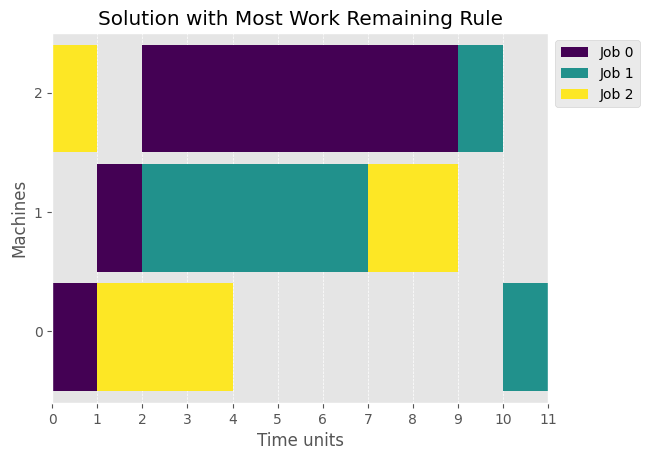

In [4]:
solver = DispatchingRuleSolver(dispatching_rule="most_work_remaining")
schedule = solver(instance)
plot_gantt_chart(schedule, title="Solution with Most Work Remaining Rule")
plt.show()

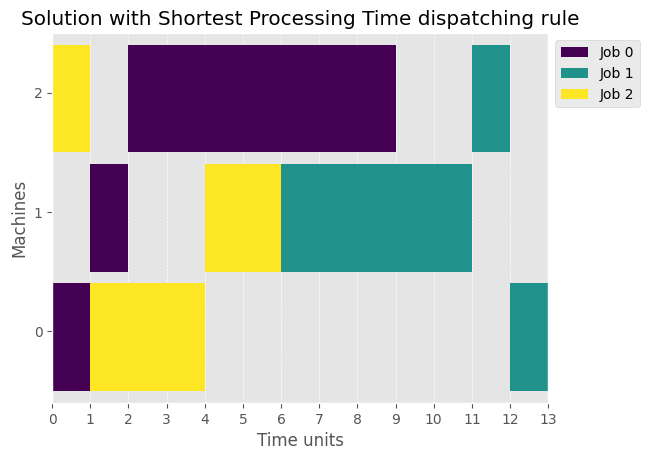

In [5]:
solver = DispatchingRuleSolver(dispatching_rule="shortest_processing_time")
schedule = solver(instance)
plot_gantt_chart(
    schedule, title="Solution with Shortest Processing Time dispatching rule"
)
plt.show()

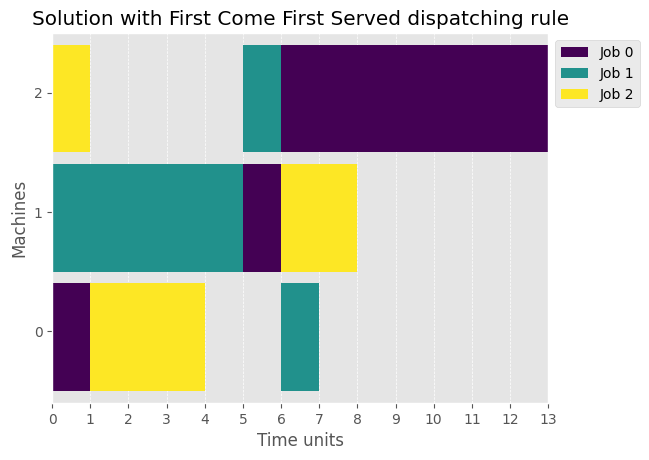

In [6]:
solver = DispatchingRuleSolver(dispatching_rule="first_come_first_served")
schedule = solver(instance)
plot_gantt_chart(
    schedule, title="Solution with First Come First Served dispatching rule"
)
plt.show()

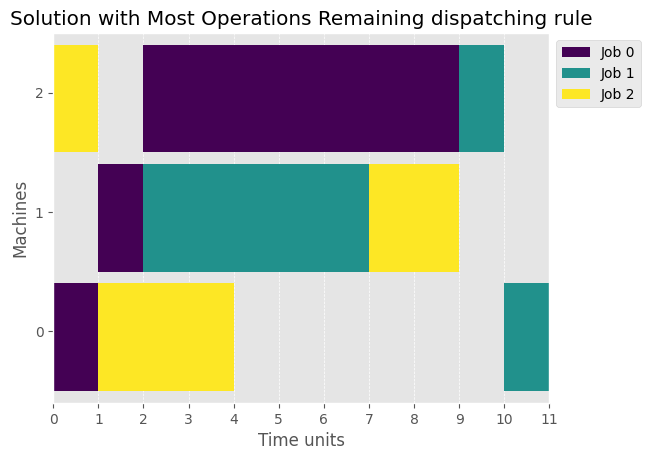

In [7]:
solver = DispatchingRuleSolver(
    dispatching_rule="most_operations_remaining", machine_chooser="random"
)
schedule = solver(instance)
plot_gantt_chart(
    schedule, title="Solution with Most Operations Remaining dispatching rule"
)
plt.show()

### Solving a Benchmark Instance

In [8]:
benchmark_instance = load_benchmark_instance("ft06")

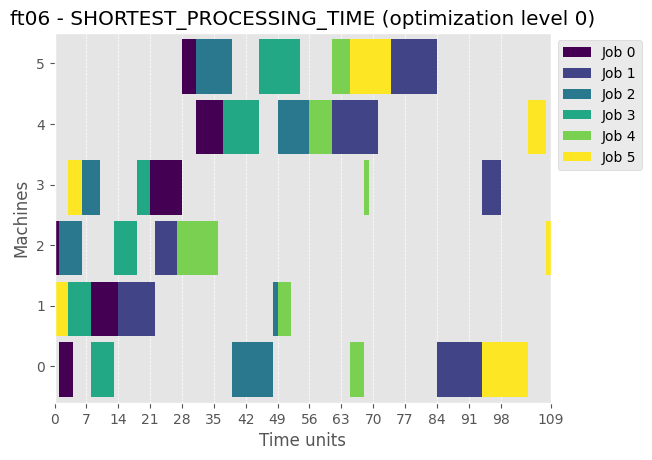

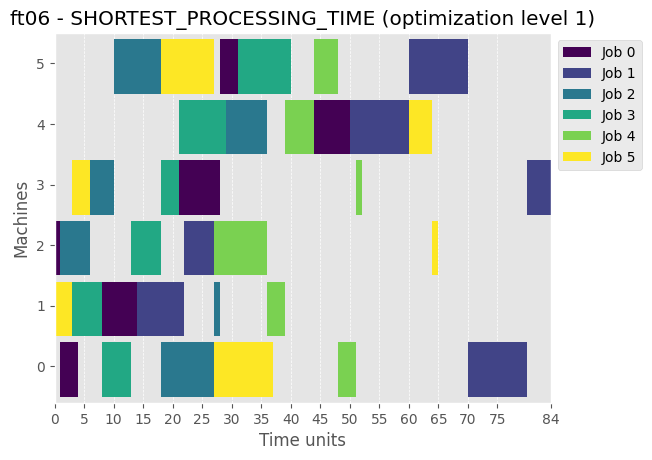

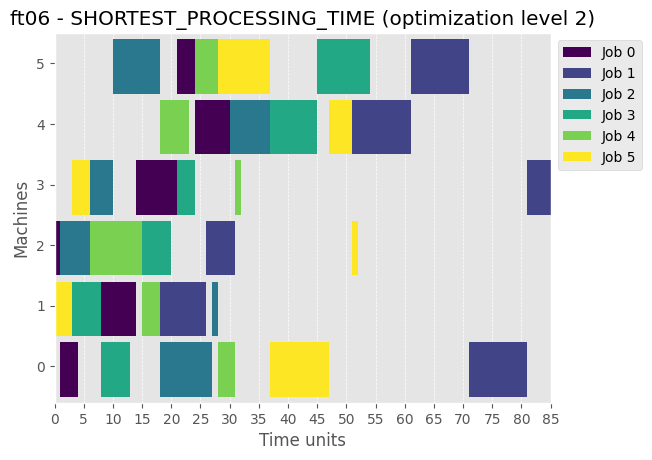

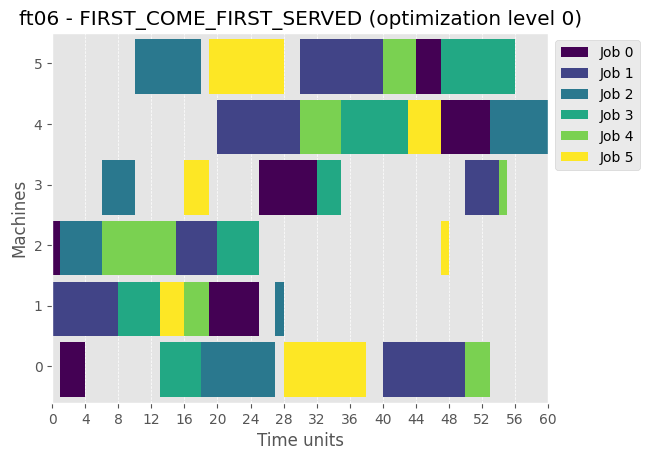

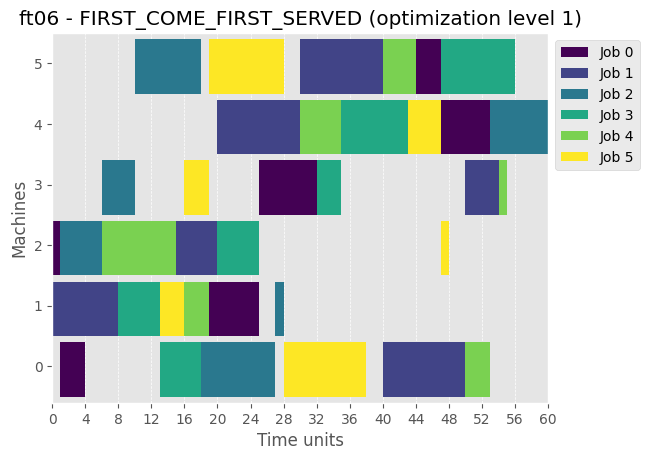

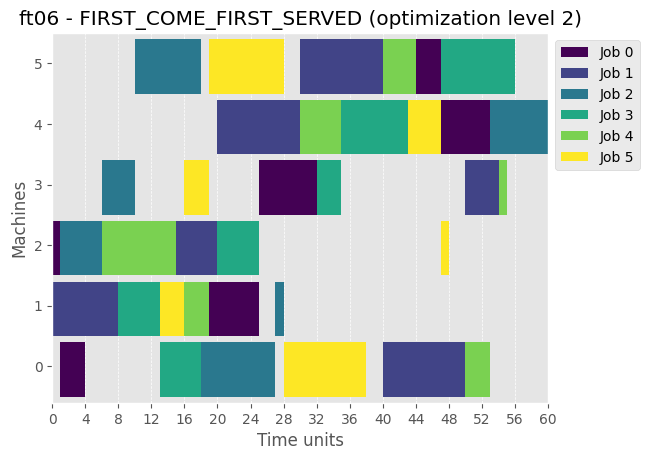

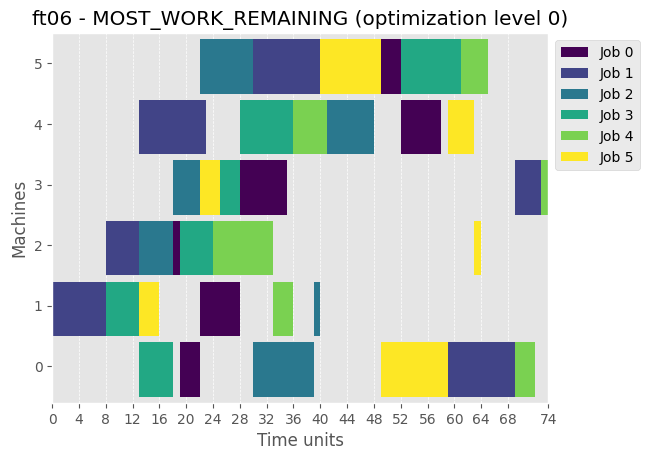

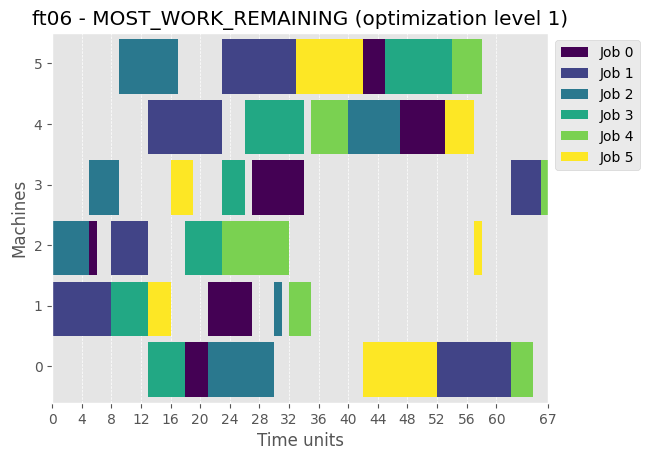

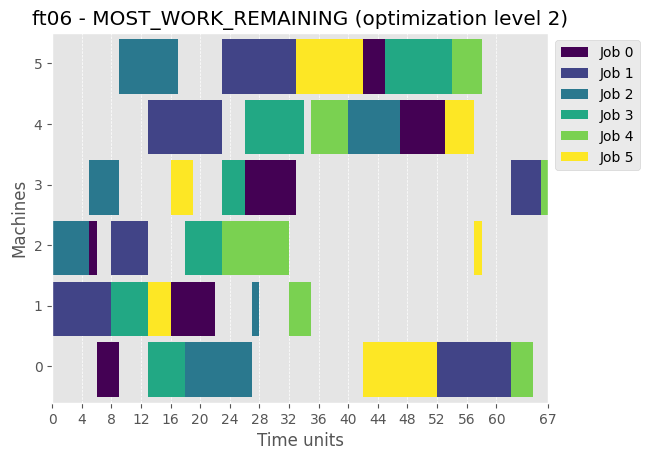

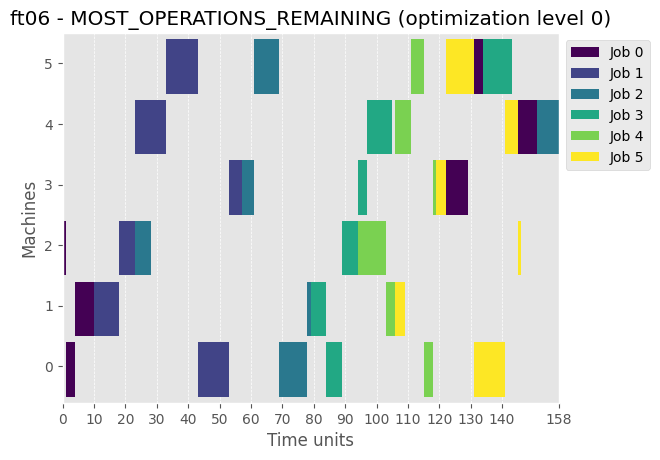

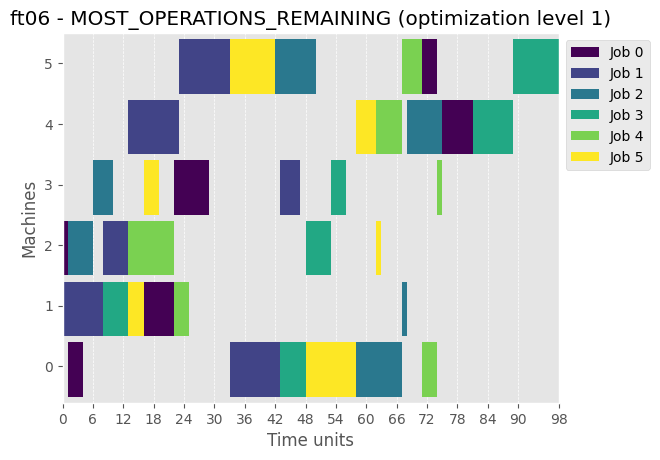

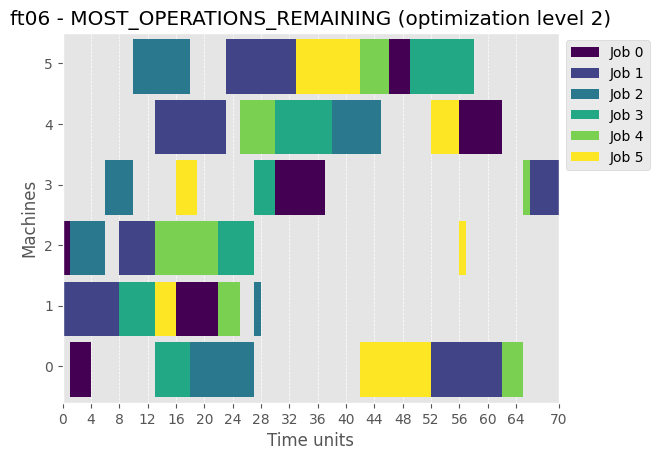

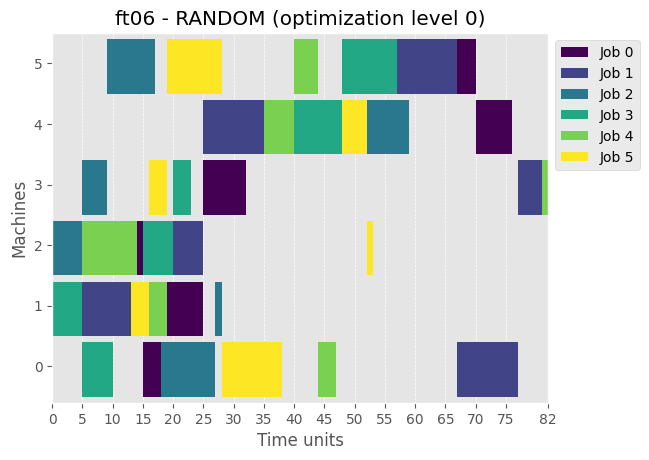

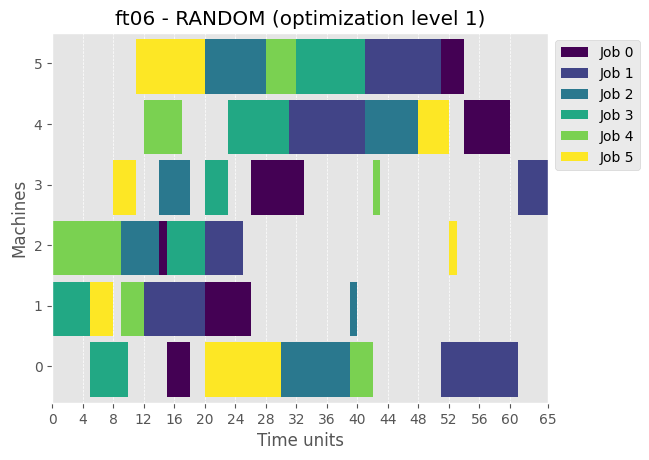

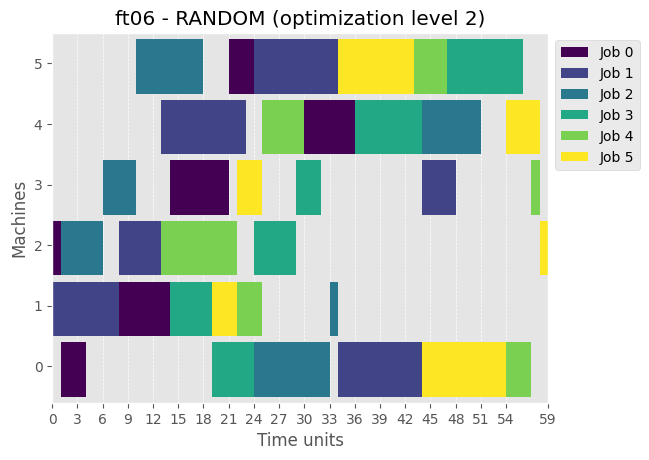

In [9]:
for dispatching_rule in DispatchingRuleType:
    for optimized in [0, 1, 2]:
        fig = plot_gantt_chart_from_dispatching_rule(
            dispatching_rule, benchmark_instance, optimization_level=optimized
        )
        plt.show()

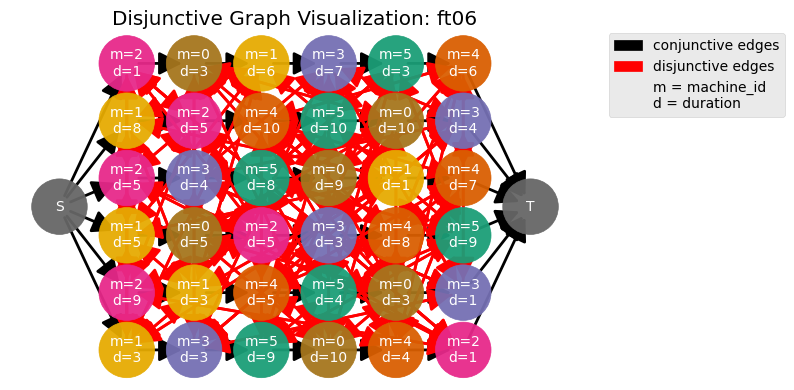

In [10]:
from job_shop_lib.visualization import plot_disjunctive_graph

_ = plot_disjunctive_graph(benchmark_instance)